In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.

In [1]:
#Import Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
#Read the Data from datasets
boston_data=datasets.load_boston()

In [5]:
#Know the description of feature names
descript=boston_data['DESCR'].split('\n')
descript[12:27:]

['        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways',
 '        - TAX      full-value property-tax rate per $10,000',
 '        - PTRATIO  pupil-teacher ratio by town',
 '        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 '        - LSTAT    % lower status of the population',
 "        - MEDV     Median value of owner-occupied homes in $1000's",
 '']

In [31]:
#preparing the data and target columns
feature=pd.DataFrame(boston_data['data'],columns=boston_data['feature_names'])
X=feature[['CRIM','ZN','INDUS','RM','TAX','LSTAT']]
tar=pd.DataFrame(boston_data['target'],columns=['MEDV'])

In [34]:
#joining the both records
data=X.join(tar)

In [39]:
#Splitting X and Y records
X = data.iloc[:,:-1]
tar=data.iloc[:,-1]

In [40]:
#splitting the records
X_train,X_test,Y_train,Y_test=train_test_split(X,tar,test_size=0.2)

In [41]:
#using randomforest algorithm to build a Model
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [57]:
#using prediction build the model
predcitions=model.predict(X_test)

In [68]:
#check score the model using training records
print('the model score is %.2f'% model.score(X_train,Y_train))
print('the value of MSE is %.2f'% mean_squared_error(Y_test,predcitions))
print('the value of R suare is: %.2f'% r2_score(Y_test,predcitions))

the model score is 0.95
the value of MSE is 10.73
the value of R suare is: 0.88


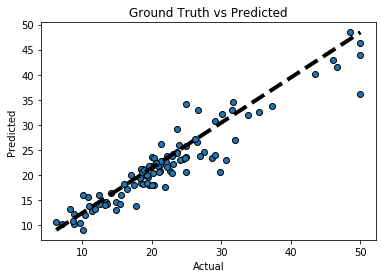

In [74]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(Y_test,predcitions, edgecolors=(0, 0, 0))

#ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.plot([Y_test.min(), Y_test.max()], [predcitions.min(), predcitions.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Ground Truth vs Predicted")

plt.show()